**1. Recursive feature elimination**

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


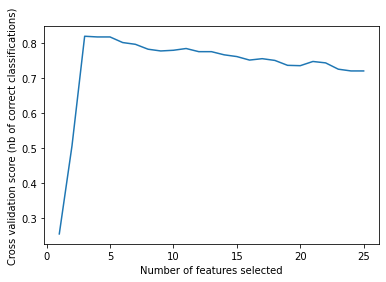

In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification

# 분류를 위한 Feature 개수가 25개인 데이터 1000개 생성
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3, n_redundant=2, n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0) # Make data

svm = SVC(kernel="linear")
# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행. ==> 데이터셋이 작은 경우 적용
rfecv = RFECV(estimator=svm, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

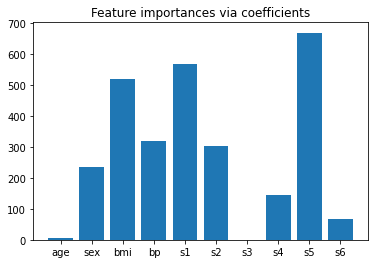

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [4]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01
print('threshold:', threshold)

sfm = SelectFromModel(lasso, threshold='1.5 * median').fit(X, y)
print("Features selected by SelectFromModel: "
      f"{feature_names[sfm.get_support()]}")

threshold: 521.748542606749
Features selected by SelectFromModel: ['bmi' 's1' 's5']


**2. Permutation importance**

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)

#학습, 예측, R2 Score 평가 
model = Ridge(alpha=1e-2).fit(X_train, y_train)
y_pred = model.predict(X_val)
print('r2 score:', r2_score(y_val, y_pred))

r2 score: 0.35666062386954556


In [6]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)

# 가장 평균 permutation importance가 높은 순으로 내림차순 정렬 후 평균 permutation importance값과 표준 편차 출력
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(diabetes.feature_names[i],"   ", np.round(r.importances_mean[i], 4), " +/- ", np.round(r.importances_std[i], 5))

s5     0.2042  +/-  0.04965
bmi     0.1758  +/-  0.0484
bp     0.0884  +/-  0.03284
sex     0.0559  +/-  0.02319
